# Problem Statement:
    
## 1) Prepare a classification model using SVM for salary data 

### Data Description:

- age -- age of a person
- workclass	-- A work class is a grouping of work 
- education	-- Education of an individuals	
- maritalstatus -- Marital status of an individulas	
- occupation	 -- occupation of an individuals
- relationship -- 	
- race --  Race of an Individual
- sex --  Gender of an Individual
- capitalgain --  profit received from the sale of an investment	
- capitalloss	-- A decrease in the value of a capital asset
- hoursperweek -- number of hours work per week	
- native -- Native of an individual
- Salary -- salary of an individual

In [1]:
#Import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
#import dataset
df=pd.read_csv(r'C:\Users\admin\Documents\Data Science\Assignment\Support_Vector_Machines\SalaryData_Test.csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


# EDA

In [3]:
#shape of data
df.shape

(15060, 14)

In [4]:
#check for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [5]:
#check for duplicated records
df.duplicated().sum()

930

In [6]:
#drop the duplicates
df.drop_duplicates(inplace=True)

In [7]:
#check for duplicated records
df.duplicated().sum()

0

In [8]:
df.shape

(14130, 14)

In [9]:
#Descriptive Statestics
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,14130.000000,14130.000000,14130.000000,14130.000000,14130.000000
mean,39.155414,10.120736,1185.899292,94.499646,41.073885
std,13.429544,2.602557,7903.191981,417.955786,12.268036
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,40.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:
#Check for missing values
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Visualization

In [11]:
#Catagorized the catagorical features
catagorical_feature= [feature for feature in df.columns if df[feature].dtype=='O']
df[catagorical_feature]

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
15055,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
15056,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
15057,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
15058,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


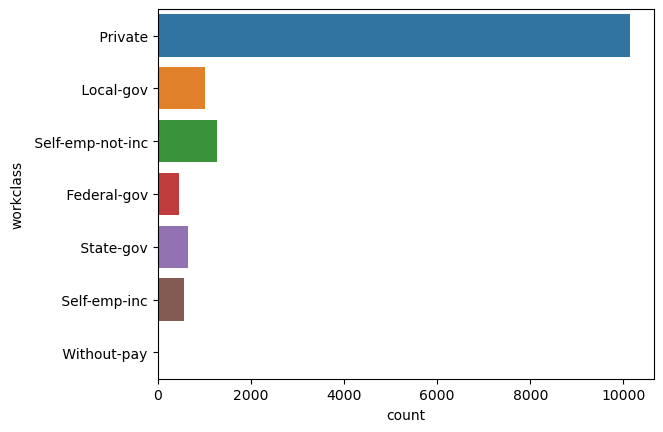

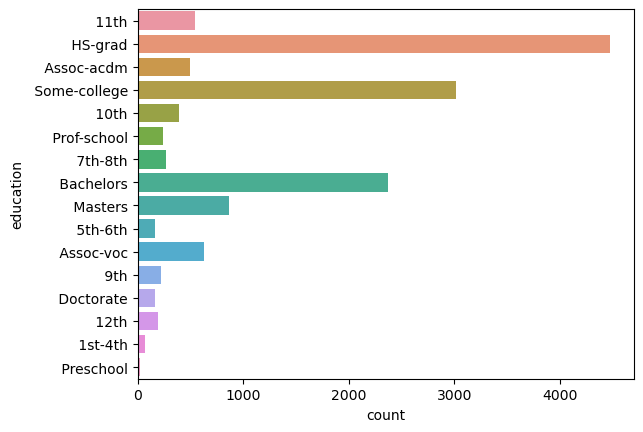

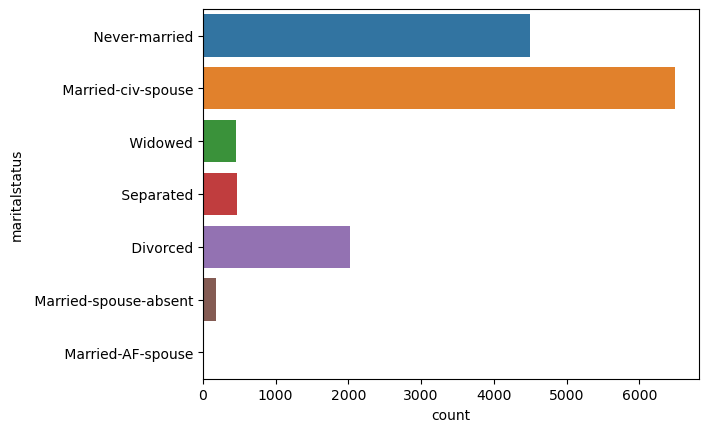

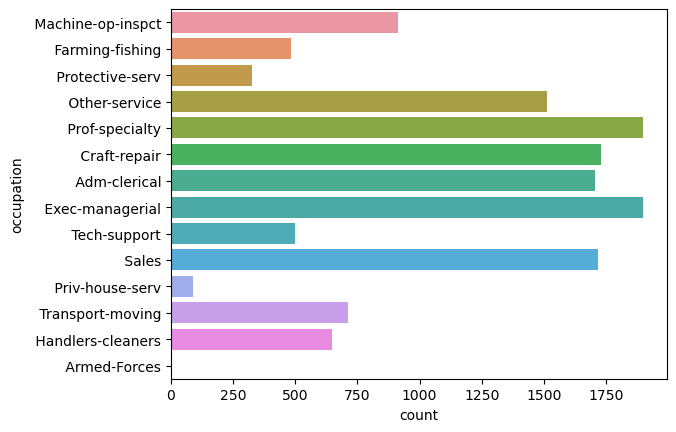

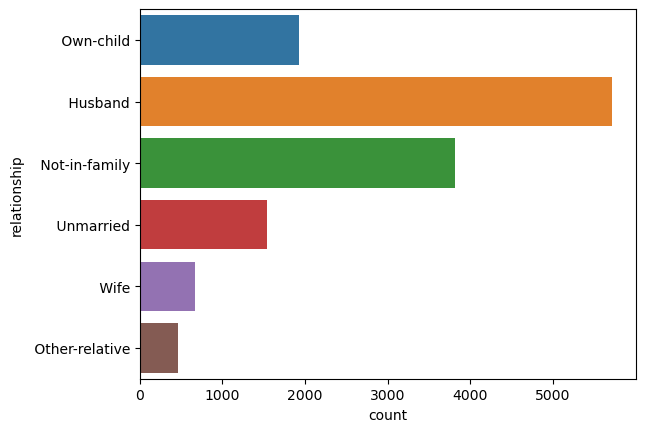

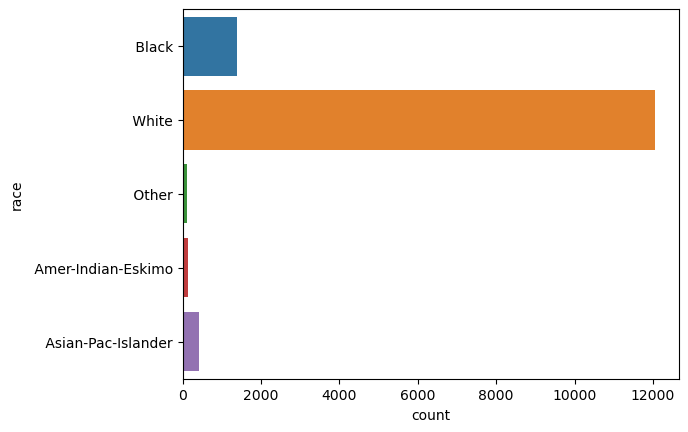

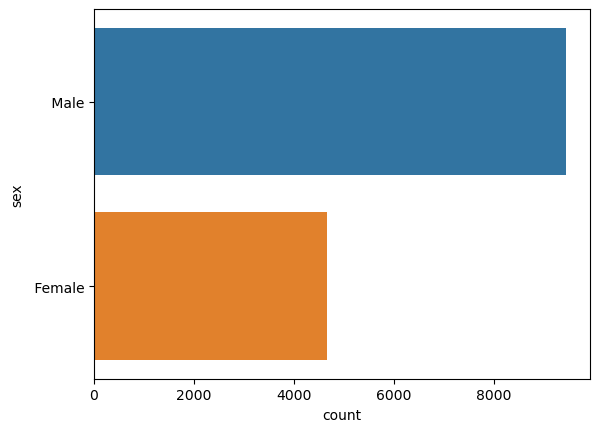

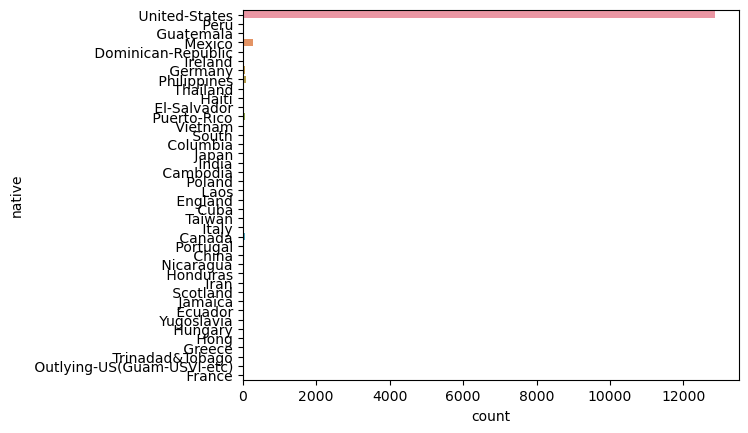

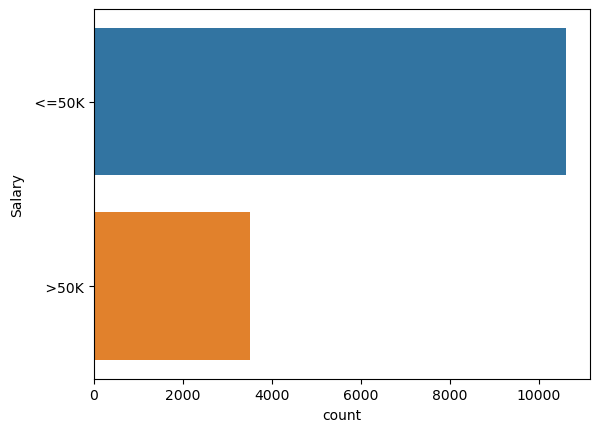

In [12]:
for feature in catagorical_feature:
    data=df.copy()
    sns.countplot(y=data[feature])
    plt.show()

In [13]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

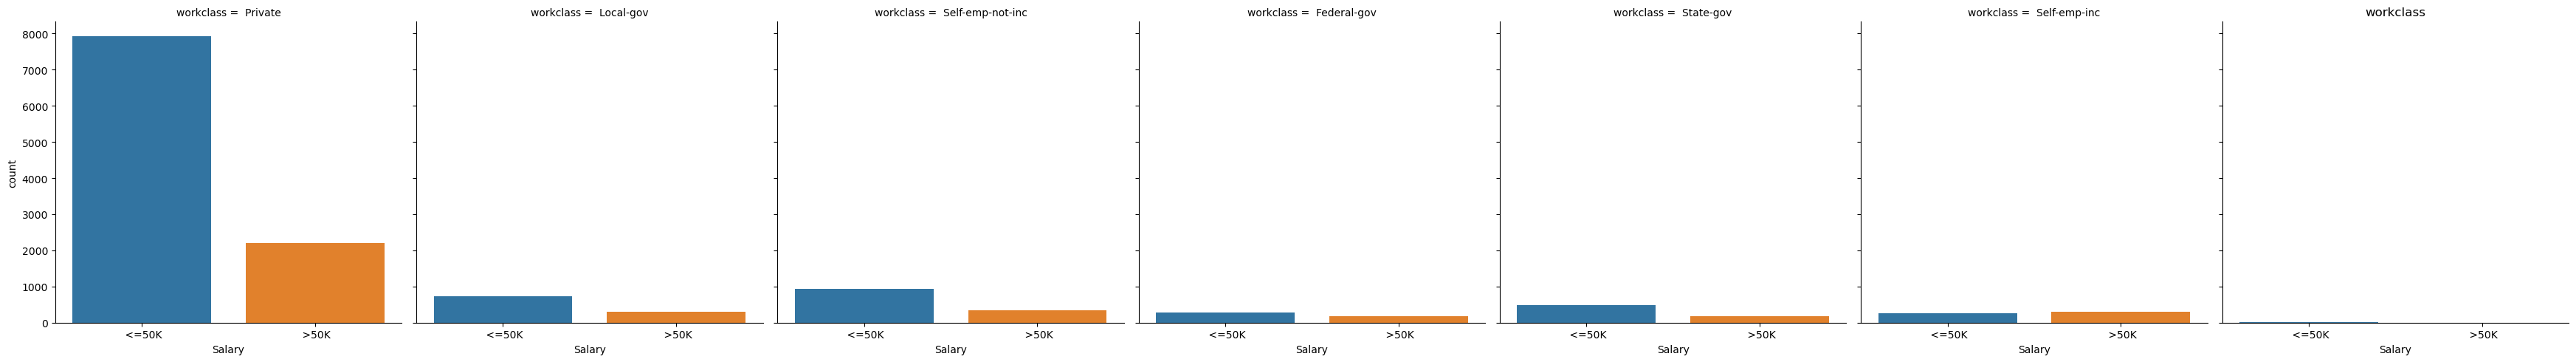

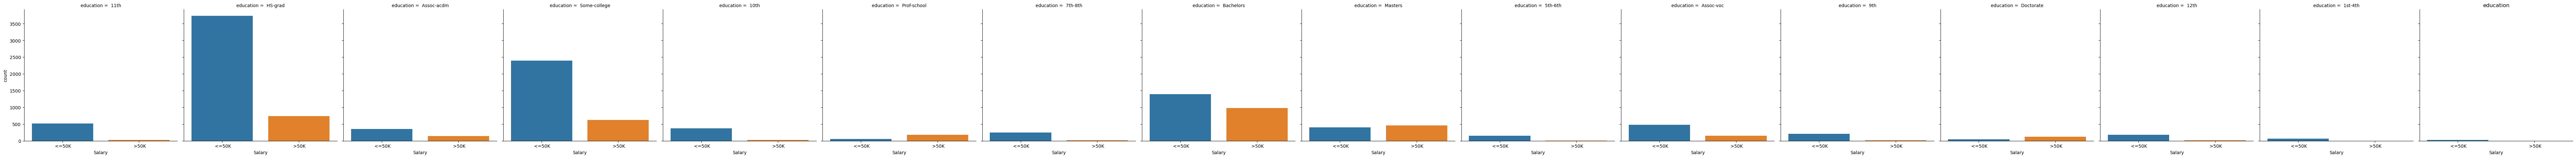

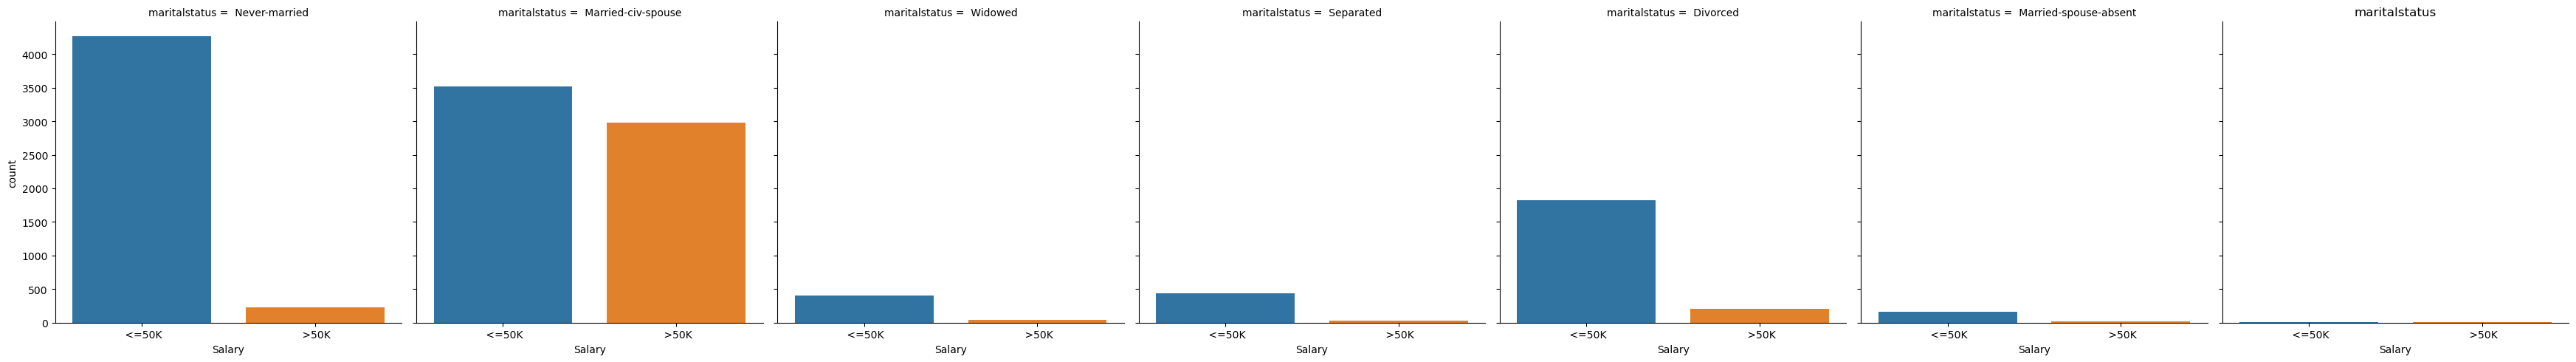

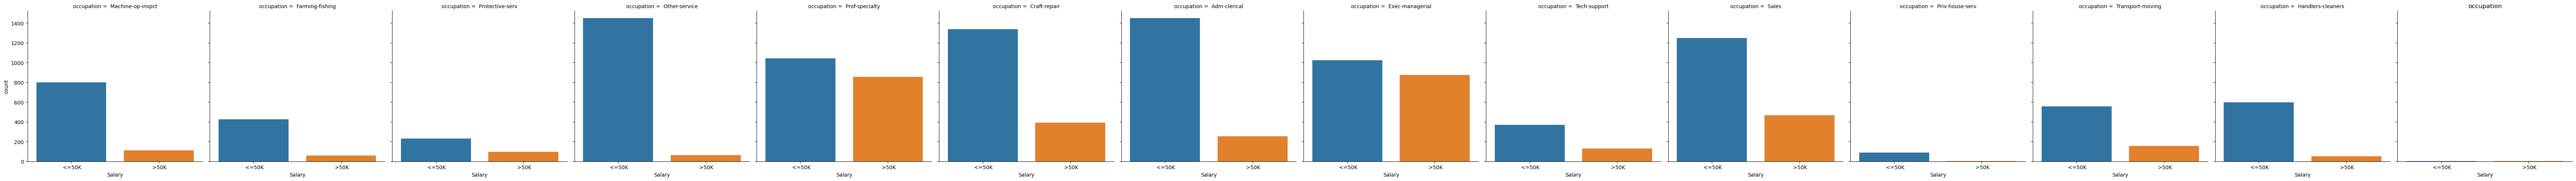

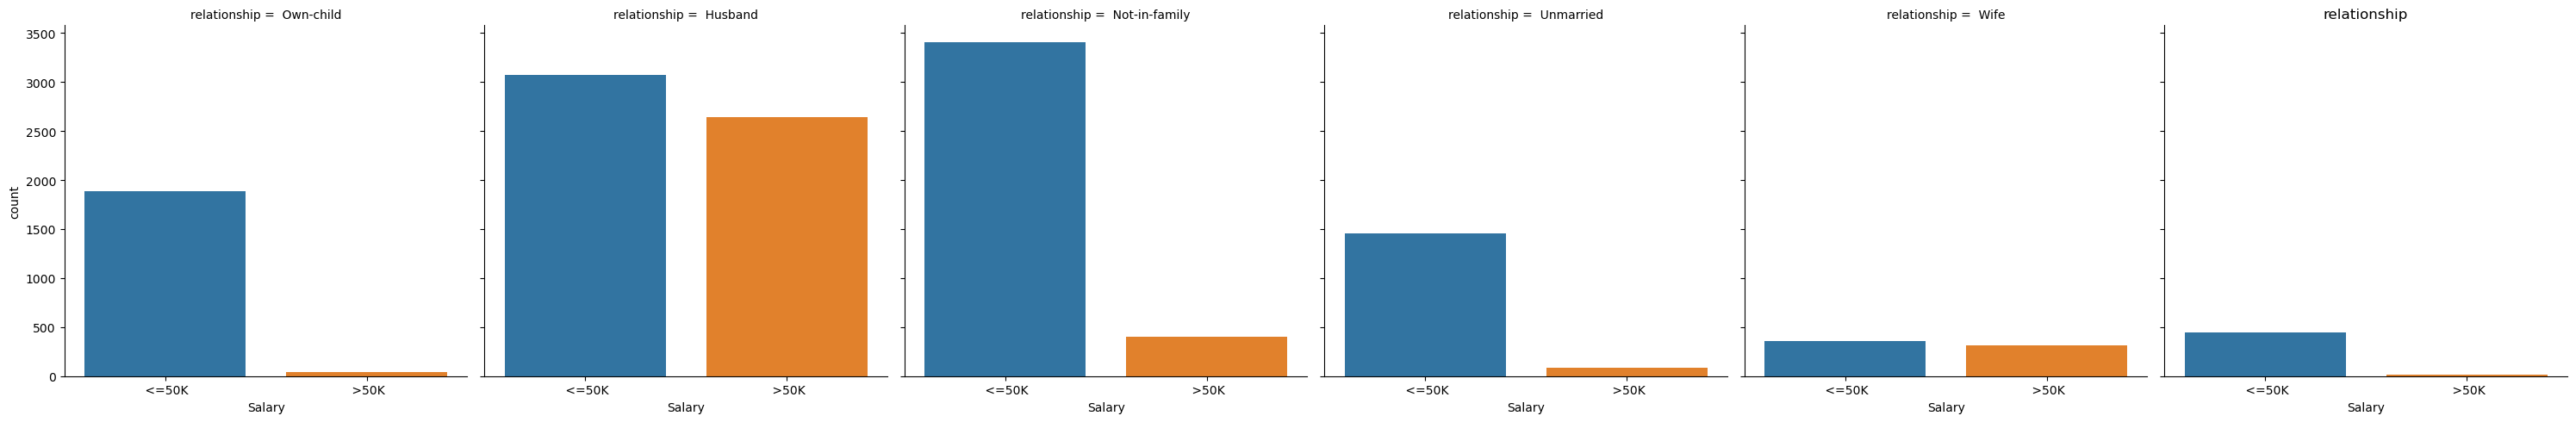

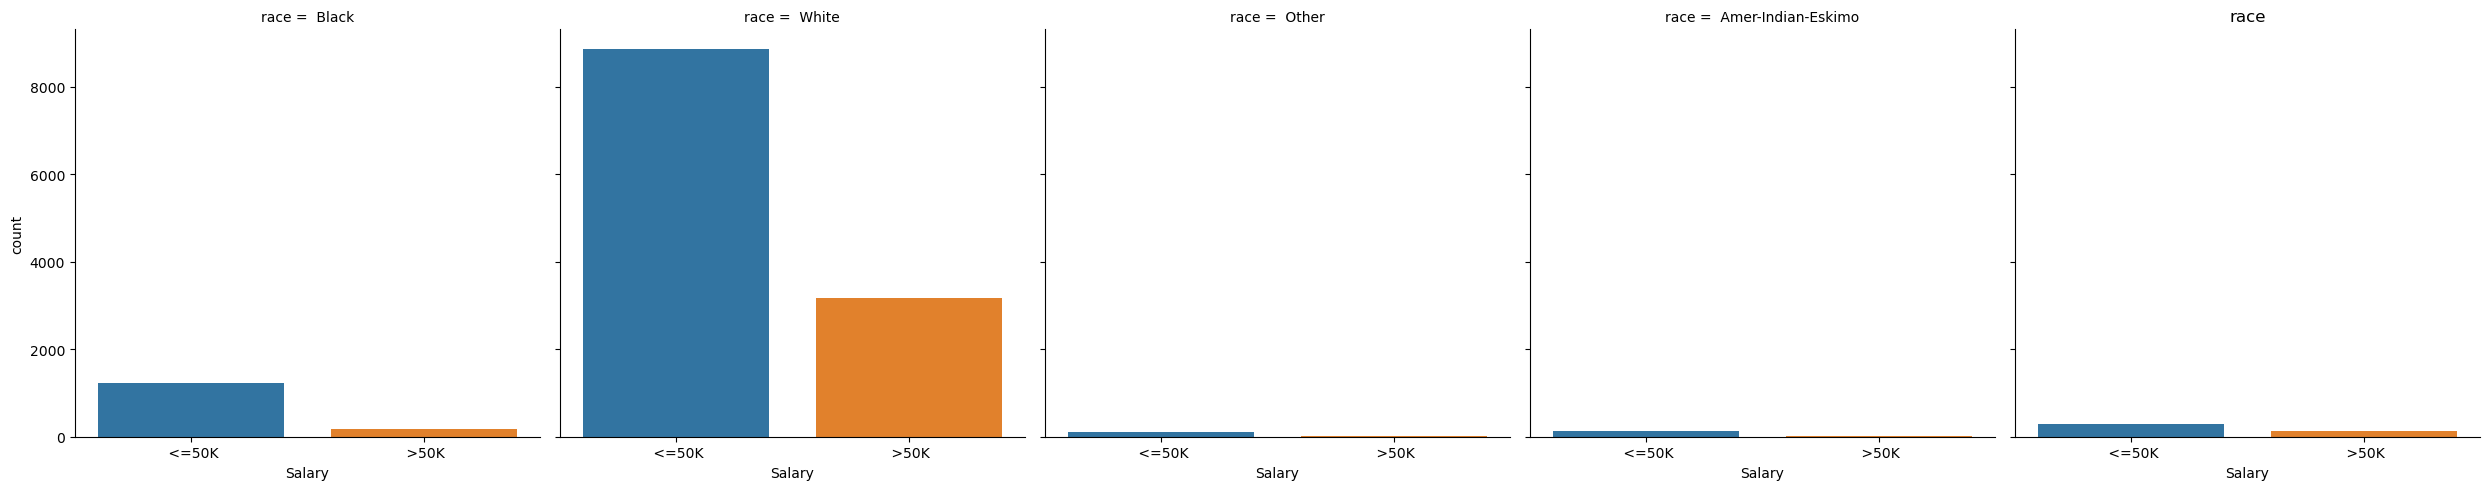

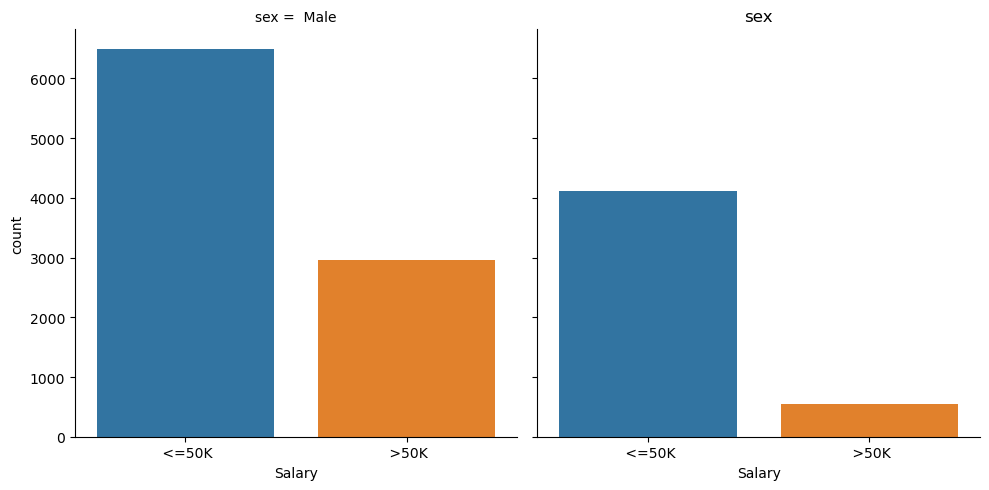

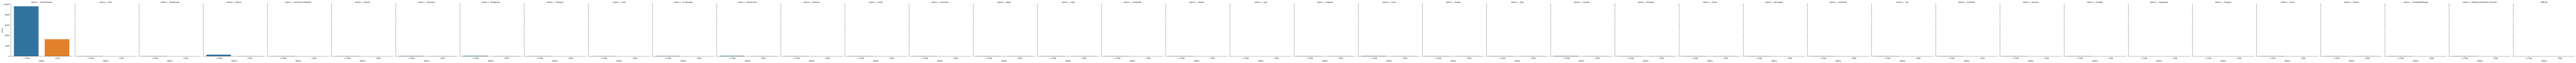

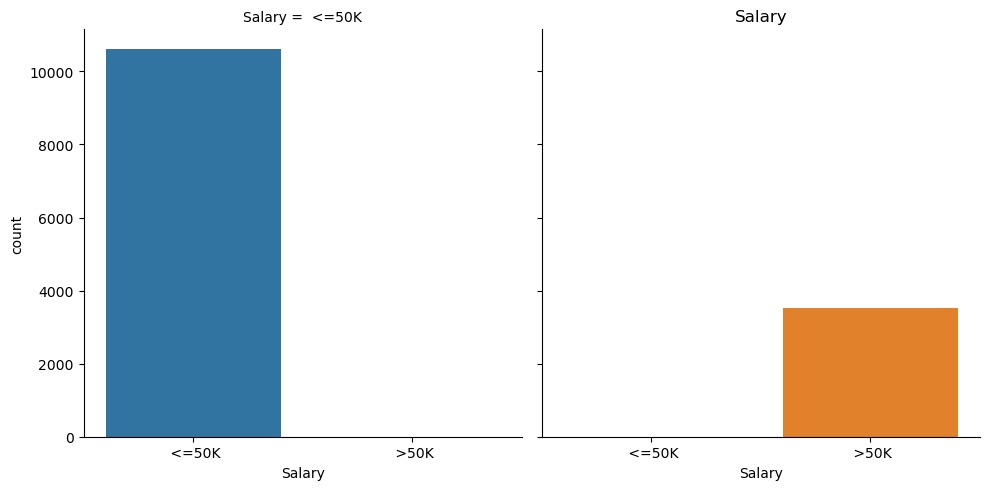

In [14]:
#see the visualization of all features with respect to target column
for feature in catagorical_feature:
    data=df.copy()
    sns.catplot(x='Salary',col=feature ,kind='count',data=data)
    plt.title(feature)
    plt.show()

In [15]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

<AxesSubplot:xlabel='age', ylabel='hoursperweek'>

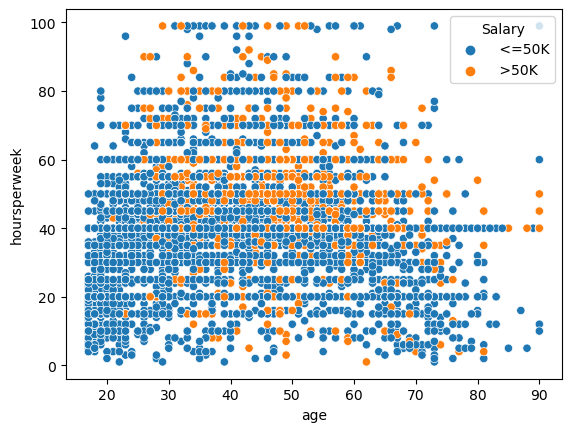

In [16]:
sns.scatterplot(x='age', y='hoursperweek',hue='Salary', data=df)

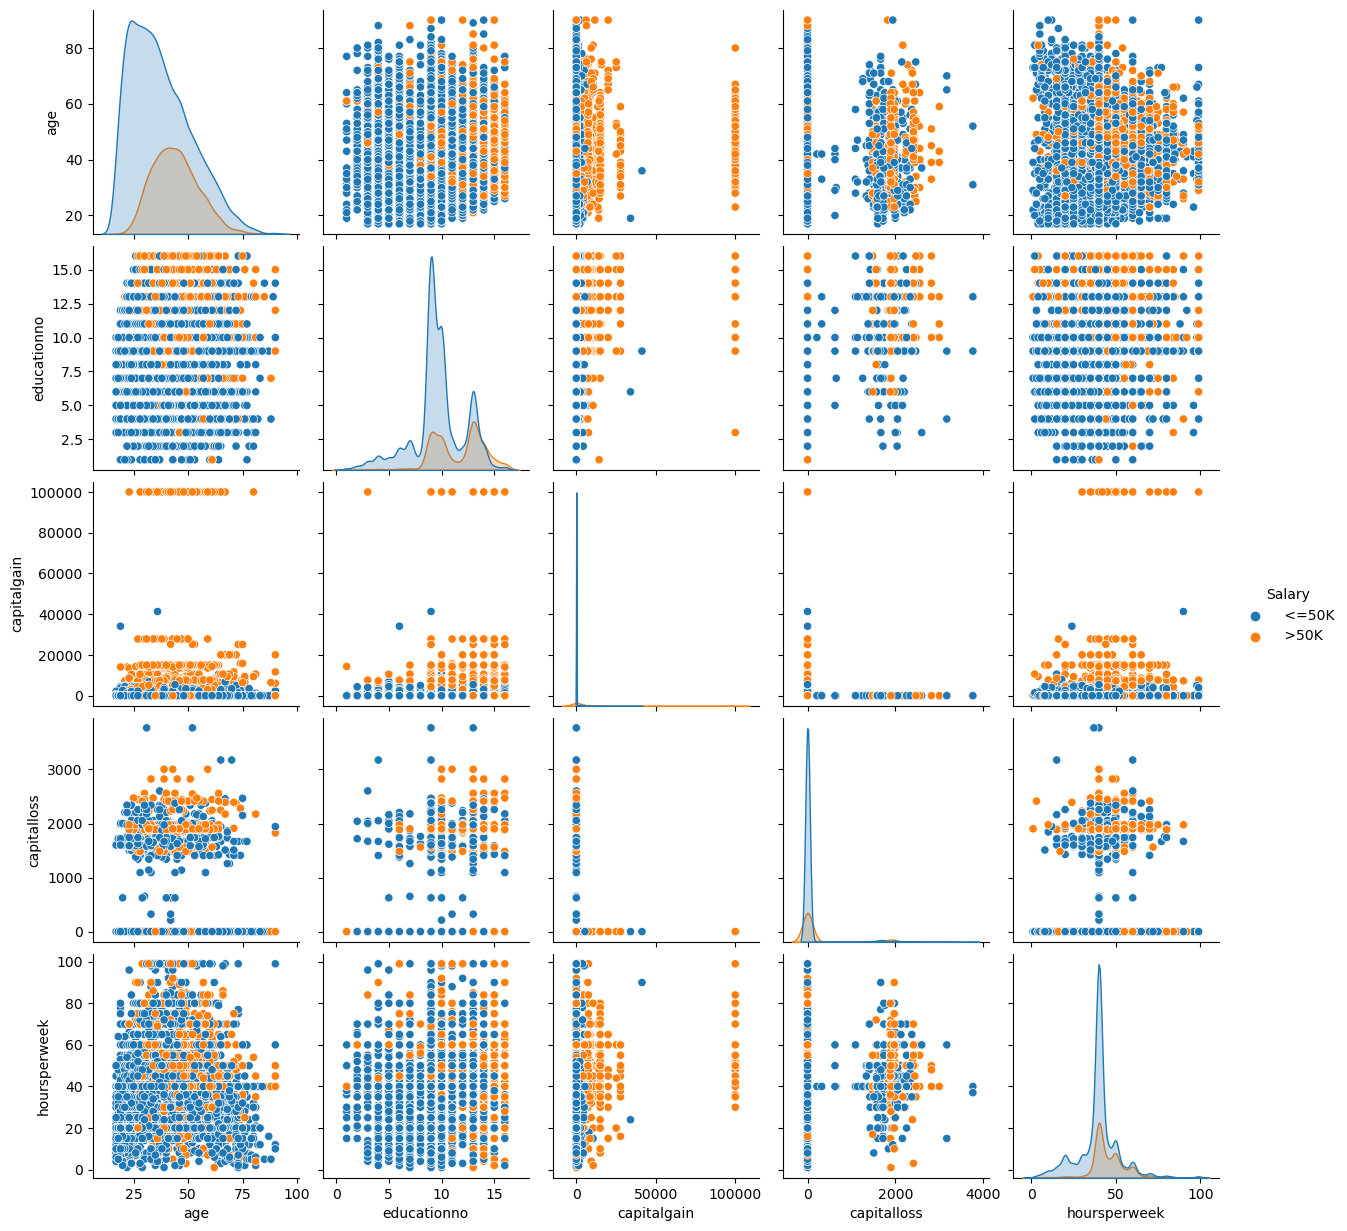

In [17]:
sns.pairplot(df,hue='Salary')

In [18]:
#saggrigate the numerical feature
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
df[numerical_features]

,age,educationno,capitalgain,capitalloss,hoursperweek
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,34,6,0,0,30
...,...,...,...,...,...
15055,33,13,0,0,40
15056,39,13,0,0,36
15057,38,13,0,0,50
15058,44,13,5455,0,40


C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


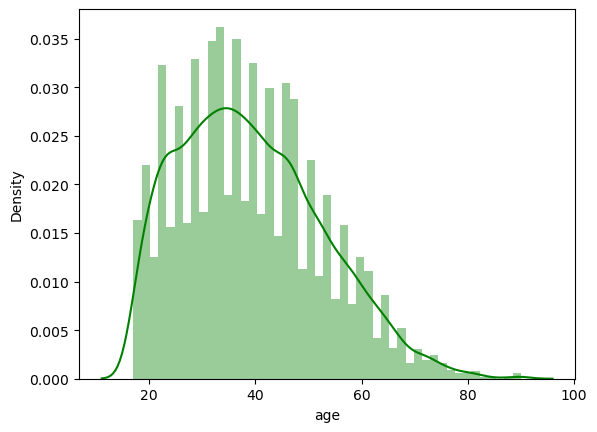

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


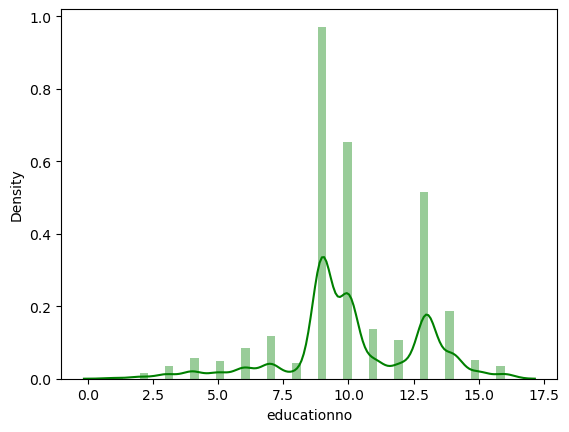

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


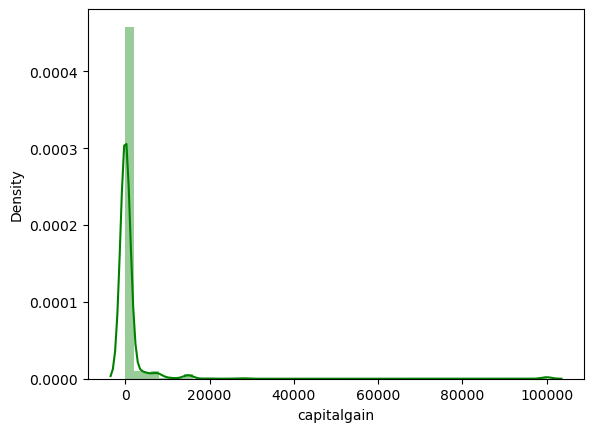

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


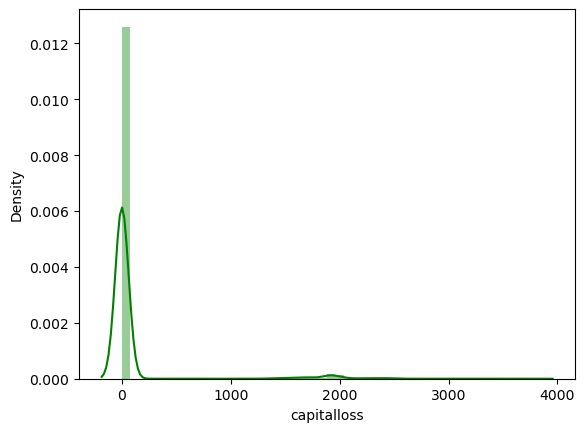

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


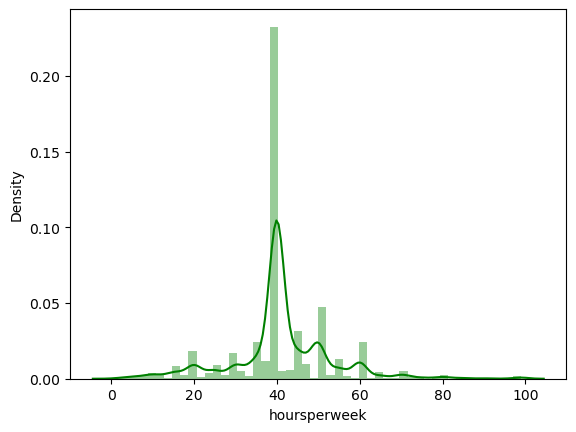

In [19]:
data=df.copy()
for feature in numerical_features:
    sns.distplot(data[feature],color='g')
    plt.show()

# Feature Engineering
- feature Encoding
- feature scaling

In [20]:
df1=df.copy()
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [21]:
for i in df1.columns:
    if df1[i].dtypes=='O':
        print(i)
        print(df1[i].unique())
        print('______________________________________________________________________________________')

workclass
[' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']
______________________________________________________________________________________
education
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']
______________________________________________________________________________________
maritalstatus
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Separated'
 ' Divorced' ' Married-spouse-absent' ' Married-AF-spouse']
______________________________________________________________________________________
occupation
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']
__________________________

In [22]:
y=df1['Salary']

In [23]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 1])

In [24]:
df1['workclass']=le.fit_transform(df1['workclass'])
df1['education']=le.fit_transform(df1['education'])
df1['maritalstatus']=le.fit_transform(df1['maritalstatus'])
df1['occupation']=le.fit_transform(df1['occupation'])
df1['relationship']=le.fit_transform(df1['relationship'])
df1['race']=le.fit_transform(df1['race'])
df1['sex']=le.fit_transform(df1['sex'])
df1['native']=le.fit_transform(df1['native'])

In [25]:
x=df1.drop(columns={'Salary'})
x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [26]:
# Feature Scaling:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.05408752, -0.22877429, -2.38547513, ..., -0.22610763,
        -0.08753833,  0.26950358],
       [-0.08603828, -0.22877429,  0.20086709, ..., -0.22610763,
         0.72761694,  0.26950358],
       [-0.83069154, -1.23706521, -0.8336698 , ..., -0.22610763,
        -0.08753833,  0.26950358],
       ...,
       [-0.08603828, -0.22877429, -0.31640136, ..., -0.22610763,
         0.72761694,  0.26950358],
       [ 0.36075367, -0.22877429, -0.31640136, ..., -0.22610763,
        -0.08753833,  0.26950358],
       [-0.30943426,  0.77951663, -0.31640136, ..., -0.22610763,
         1.54277221,  0.26950358]])

In [27]:
#Split the data into train_test_split:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.20, random_state=1)

# Model Building

In [28]:
svm=SVC()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2105
           1       0.77      0.53      0.63       721

    accuracy                           0.84      2826
   macro avg       0.81      0.74      0.76      2826
weighted avg       0.83      0.84      0.83      2826



In [29]:
print(svm.score(xtrain,ytrain))
print(svm.score(xtest,ytest))

0.8545647558386412
0.8393489030431706


# Hyperparameter tuning

In [33]:
params={
    'C':[0.1,0.01,0.001,0.0001,1,10],
    'kernel':['linear', 'poly', 'rbf'],
    'gamma':['scale', 'auto']
}

In [34]:
grid=GridSearchCV(estimator=svm,param_grid=params,verbose=1)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 0.0001, 1, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [36]:
grid.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [37]:
model=SVC(C=10,gamma='auto',kernel='rbf')
model.fit(xtrain,ytrain)
ypred_=model.predict(xtest)
print(classification_report(ytest,ypred_))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2105
           1       0.75      0.54      0.63       721

    accuracy                           0.84      2826
   macro avg       0.80      0.74      0.76      2826
weighted avg       0.83      0.84      0.83      2826



In [38]:
print(model.score(xtrain,ytrain))
print(model.score(xtest,ytest))

0.8714614295824487
0.8368719037508846


# Random forest algorithm

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
def predict(model1):
    model1.fit(xtrain,ytrain)
    ypred_1=model1.predict(xtest)
    print('Training_Accuracy:',model1.score(xtrain,ytrain))
    print('Testing_Accuracy:',model1.score(xtest,ytest))
    print(classification_report(ytest,ypred_1))

In [41]:
predict(RandomForestClassifier())

Training_Accuracy: 0.9862880396319886
Testing_Accuracy: 0.8283793347487615
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2105
           1       0.71      0.56      0.62       721

    accuracy                           0.83      2826
   macro avg       0.78      0.74      0.76      2826
weighted avg       0.82      0.83      0.82      2826



# Hyperparameter Tuning for Random forest algorithm`

In [42]:
params={
    'n_estimators':[range(1,200)],
    'criterion': ['entropy','gini'],
    'max_depth':[2,3,4,5,6,7,8],
    'min_samples_split':[2,3,4,5,6,7,8],
    'min_samples_leaf':[2,3,4,5,6,7,8],
    'max_features':["auto", "sqrt", "log2"]
}

In [43]:
grid=GridSearchCV(estimator=RandomForestClassifier(), param_grid=params,verbose=2)

In [44]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 2058 candidates, totalling 10290 fits
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_f

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=4, min_samples_split=4, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimator

[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=7, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimator

[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=7, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimator

[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=3, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimator

[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=8, n_estimator

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=6, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=6, min_samples_split=6, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=8, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=7, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=range(1, 200); tota

[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=2, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); total time=   0.0s
[CV] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=7, min_samples_split=3, n_estimators=range(1, 200); tota

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10290 fits failed out of a total of 10290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10290 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 131, in _validate_estimator
    raise ValueError(
ValueError: n_estimators must be an in

ValueError: n_estimators must be an integer, got <class 'range'>.

In [45]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': range(1, 200)}

In [48]:
model_rf=RandomForestClassifier(criterion='entropy',max_depth=2,max_features='auto',min_samples_split=2,min_samples_leaf=2)
model_rf.fit(xtrain,ytrain)
ypred_rf=model_rf.predict(xtest)
print(classification_report(ytest,ypred_rf))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2105
           1       1.00      0.13      0.23       721

    accuracy                           0.78      2826
   macro avg       0.89      0.57      0.55      2826
weighted avg       0.83      0.78      0.71      2826



In [49]:
print('Training Accuracy:',model_rf.score(xtrain,ytrain))
print('Testing Accuracy:',model_rf.score(xtest,ytest))

Training Accuracy: 0.7859164897381458
Testing Accuracy: 0.778131634819533


In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
predict(KNeighborsClassifier(n_neighbors=7))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Training_Accuracy: 0.8631457891012031


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Testing_Accuracy: 0.813517338995046
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      2105
           1       0.67      0.53      0.59       721

    accuracy                           0.81      2826
   macro avg       0.76      0.72      0.74      2826
weighted avg       0.80      0.81      0.81      2826

